In [50]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [51]:
data_m=50                    #每个节点数据集的个数
N = 3                        #x的维数
n = NETWORK_SIZE = 10     #节点的个数
xi=np.array([0,0.5,1])       #vim用到的x值，是固定的.

In [52]:
###改进
###生成系数数据 uim，data_uim是一个列表，列表中每一个元素是一个50*3的矩阵。
data_uim = []
i=j=k=0
for i in range(n):
    np.random.seed(i) #注意添加np.，否则seed可能无效。
    uim=np.random.normal(0,20,size=(data_m,N))#生成一个50*3的多位数组，均值为0，标准差为20。
    uim[:,N-1]=1#将第三列改为1，论文设定。
    data_uim.append(uim)
###生成数据 cim，data_cim是一个列表，列表中每一个元素是一个1*50的矩阵。
data_cim=[]
for k in range(n):
    np.random.seed(n+k)
    cim=np.random.normal(0,10,size=(1,data_m))
    data_cim.append(cim)
###生成数据 vim，data_vim是一个列表，列表中每一个元素是一个1*50的矩阵。
data_vim=[]
for j in range(n):
    vim = np.dot(xi,np.transpose(data_uim[j]))+data_cim[j]#target
    data_vim.append(vim)

In [53]:
#星形网络
def generateRandomNetwork():
    # 生成邻接矩阵
    for i in range(NETWORK_SIZE):
        for j in range(i+1,NETWORK_SIZE):
            if i==0 and i!=j:
                MAT_Adjacent[i][j] = MAT_Adjacent[j][i] = 1
            else:
                MAT_Adjacent[i][j] = MAT_Adjacent[j][i] = 0

    # 生成度矩阵，并验证算法是否正确
    degree = MAT_Adjacent.sum(axis=0)  # 计算lie和，degree用于存放每个节点的度
    for i in range(NETWORK_SIZE):  # 计算度矩阵
        MAT_Degree[i][i] += degree[i]
    average_degree = degree.sum() / NETWORK_SIZE
    print('平均度为' + str(average_degree))  # 计算平均度，所有节点度的和除以节点数
    
    identify = 0.0
    statistic = np.zeros((NETWORK_SIZE), dtype=float)  # statistic将用于存放度分布的数组，数组下标为度的大小，对应数组内容为该度的概率
    for i in range(NETWORK_SIZE):
        statistic[degree[i]] = statistic[degree[i]] + 1
    for i in range(NETWORK_SIZE):
        statistic[i] = statistic[i] / NETWORK_SIZE
        identify = identify + statistic[i]
    identify = int(identify)  # 取整
    print('如果output为1则该算法正确\toutput=' + str(identify))  # 用于测试算法是否正确

    # 生成网络双随机权重矩阵，基于拉普拉斯方法
    degree_max = 0
    for i in range(NETWORK_SIZE):
        if degree_max < MAT_Degree[i][i]:
            degree_max = MAT_Degree[i][i]
    Alpha = 1 / degree_max
    for i in range(NETWORK_SIZE):
        for j in range(NETWORK_SIZE):
            if (i == j):
                MAT_EdegWight[i][j] = 1 - MAT_Degree[i][i] * Alpha
            elif (MAT_Adjacent[i][j] == 1):
                MAT_EdegWight[i][j] = Alpha

# 将ER网络写入文件中
def writeRandomNetworkToFile():
    ARRS = []  # 创建字典型变量，用于之后检测问题
    f = open('randomNetwork.txt', 'w+')  # 用写的方式打开本地文件，若文件不存在，则自动建立新文件

    f.write('The adjacent matrix is:\n')
    blank_num = 2  # 规范化输出
    t = NETWORK_SIZE
    while (t >= 10):
        t /= 10
        blank_num += 1
    num_end_position = 1
    for i in range(NETWORK_SIZE):
        f.write(str(i + 1))
        if (i+1)%(10**num_end_position) == 0:
            num_end_position += 1
        for j in range(blank_num+1-num_end_position):
            f.write(' ')
        t = MAT_Adjacent[i]  # 邻接矩阵对应数值
        ARRS.append(t)
        for j in range(NETWORK_SIZE):
            s = str(t[j])  # 强制转换成字符串形式
            f.write(s)
            f.write(' ')
        f.write('\n')  # 一行结束，进行下一行填写

    # f = open('randomNetwork.txt', 'w+')  # 将度分布写入文件名为degree01文件中，若磁盘中无此文件将自动新建
    f.write('\nThe degree matrix is:\n')
    blank_num = 2  # 规范化输出
    t = NETWORK_SIZE
    while (t >= 10):
        t /= 10
        blank_num += 1

    ARRS = []
    num_end_position = 1
    for i in range(NETWORK_SIZE):
        f.write(str(i + 1))
        if (i + 1) % (10 ** num_end_position) == 0:
            num_end_position += 1
        for j in range(blank_num + 1 - num_end_position):
            f.write(' ')
        t = MAT_Degree[i]  # 邻接矩阵对应数值
        ARRS.append(t)
        for k in range(NETWORK_SIZE):
            s = str(t[k])  # 强制转换成字符串形式
            f.write(s)
            f.write(' ')
        f.write('\n')  # 一行结束，进行下一行填写
    num_end_position = 1

    f.write('\nThe distribution probability of degree is:\n')
    degree = MAT_Adjacent.sum(axis=1)  # 计算行和，degree用于存放每个节点的度
    statistic = np.zeros((NETWORK_SIZE), dtype=float)  # statistic将用于存放度分布的数组，数组下标为度的大小，对应数组内容为该度的概率
    for i in range(NETWORK_SIZE):
        statistic[degree[i]] = statistic[degree[i]] + 1
    for i in range(NETWORK_SIZE):
        statistic[i] = statistic[i] / NETWORK_SIZE
    for i in range(NETWORK_SIZE):
        f.write(str(i + 1))
        if (i + 1) % (10 ** num_end_position) == 0:
            num_end_position += 1
        for j in range(blank_num + 1 - num_end_position):
            f.write(' ')
        s = str(statistic[i])  # 注意写入操作要求是字符串格式，因此用str进行格式转换
        f.write(str(s))  # 写入的每一行由两部分组成，一个元素为度的下标，第二个元素为度的概率
        f.write('\n')  # 每个节点的度及概率写入完成将进行换行，输入下一个节点的度及度分布
    f.close()

# 用于绘制ER图
def showGraph():
    G = nx.Graph()
    nodes = np.array(range(NETWORK_SIZE))
    G.add_nodes_from(nodes)
    for i in range(len(MAT_Adjacent)):
        for j in range(len(MAT_Adjacent)):
            if MAT_Adjacent[i][j] == 1:  # 如果不加这句将生成完全图，ER网络的邻接矩阵将不其作用
                G.add_edge(i, j)
    position = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, position, nodelist=nodes, node_color="r")
    nx.draw_networkx_edges(G, position)
    nx.draw_networkx_labels(G, position)
    plt.show()

平均度为1.8
如果output为1则该算法正确	output=1


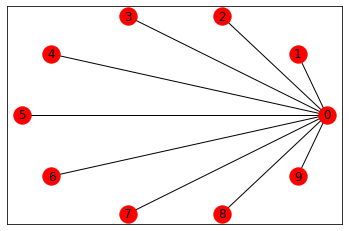

In [54]:
MAT_Adjacent = np.zeros((NETWORK_SIZE, NETWORK_SIZE), dtype=int)  # 初始化邻接矩阵
MAT_Degree = np.zeros((NETWORK_SIZE, NETWORK_SIZE), dtype=int)  # 初始化度矩阵
MAT_Laplacian = np.zeros((NETWORK_SIZE, NETWORK_SIZE), dtype=int)  # 初始化拉普拉斯矩阵（不一定用到）
MAT_EdegWight = np.zeros((NETWORK_SIZE, NETWORK_SIZE), dtype=float)  # 初始化边权重阵

generateRandomNetwork()  # 生成ER随机网络
writeRandomNetworkToFile()  # 将随机网络写入randomNetwork.txt文件中
showGraph()
W=MAT_EdegWight

In [55]:
W

array([[0.        , 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.88888889, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.        , 0.88888889, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.        , 0.        , 0.88888889, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.        , 0.        , 0.        , 0.88888889,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.        , 0.        , 0.        , 0.        ,
        0.88888889, 0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.88888889, 0.        , 0.        , 0.        ],
       [0.11111111, 0.        , 0.       

In [56]:
def loss_2(x):
    data_loss=np.zeros(n)#定义为数组而不是列表会减少很多麻烦
    i=0
    DNGD_loss=0
    for i in range(n):
        loss=1/data_m*(np.dot(x[i,:],np.transpose(data_uim[i]))-data_vim[i])**2
        
        loss=sum(loss)
        loss=sum(loss)
        data_loss[i]=loss
    DNGD_loss=sum(data_loss)
    return DNGD_loss

In [57]:
#分布式的梯度函数1
def grad_2(x):
    x=np.array(x)
    data_grad=np.zeros((n,N))#定义为数组而不是列表会减少很多麻烦
    i=0
    for i in range(n):
        uim=data_uim[i]
        grad=2/data_m*np.dot((np.dot(x[i,:],np.transpose(uim))-data_vim[i]),uim)
        data_grad[i,:]=grad
    return data_grad

In [58]:
###算法1，使用邻居状态
if __name__ == '__main__':
    iter=5000
    x=np.ones((n,N)) 
    a1=0.009
    loss=0
    grad=0
    plt_loss_1=[]
    for i in range(iter):
        a=a1/(i+1)
        grad=grad_2(x)
        x=np.dot(W,x)-a*grad
        loss=loss_2(x)
        loss=loss/n
        plt_loss_1.append(loss)
    algorithm_1_loss=loss
    plt.plot(range(iter),np.array(plt_loss_1))
    plt.plot(range(iter),np.array(plt_loss_1))#默认98.2434为最优值。f-f*,f*默认为GD算法的最小loss
    plt.yscale('log')
    plt.show()
    print(x[1,:])
    print('最后一次迭代的梯度为',sum(grad))
    print('利用算法得到的最低loss为',algorithm_1_loss)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
###D-NG
if __name__ == '__main__':
    iter=5000
    loss=0
    x=y=np.ones((n,N))
    a=0.00008
    p=0
    plt_loss_2=[]
    for i in range(iter):
        a_1=a/(1+i)
        p=i/(i+3)
        loss=loss_2(x)
        loss=loss/n
        plt_loss_2.append(loss)
        x_1=x#D-NG
        x=np.dot(W,y)-a_1*grad_2(y)
        y=x+p*(x-x_1)
    print('利用算法得到的最低loss为',loss)
    plt.plot(np.array(range(iter)),np.array(plt_loss_2))
    plt.yscale('log')
    plt.show()

In [ ]:
###EXTRA
if __name__ == '__main__':
    iter=5000
    loss=0
    x=1*np.ones((n,N))
    a=0.0002025
    x_1=np.dot(W,x)-a*grad_2(x)
    W_=(np.eye(n,n)+W)/2
    plt_loss_3=[]
    for i in range(iter):
        loss=loss_2(x)
        loss=loss/n
        plt_loss_3.append(loss)
        x_2=np.dot(np.eye(n,n)+W,x_1)-np.dot(W_,x)-a*(grad_2(x_1)-grad_2(x))#EXTRA
        x=x_1
        x_1=x_2
    print('利用算法得到的最低loss为',loss)
    plt.plot(np.array(range(iter)),np.array(plt_loss_3))
    plt.yscale('log')
    plt.show()

In [ ]:
W1=np.zeros((n,n))
W1[0,:]=1/n

In [ ]:
#老师的算法1
###算法1，使用邻居状态
if __name__ == '__main__':
    iter=5000
    x0=x=np.ones((n,N))
    sum0=np.zeros((n,N))
    alpha=0.009
    theta=0.001
    loss=0
    grad=0
    plt_loss_4=[]
    for k in range(iter+1):
        x00=x0#存k-1时刻的值
        x0=x#存k时刻的值
        for i in range(n):
            for j in range(n):
                if i==0:
                    s0=x[j]-x[i]
                    sum0[0]=s0+sum0[0]
                else:
                    sum0[i]=x[0]-x[i]
        grad=grad_2(x)
        x=x+alpha*sum0-alpha*np.dot(W1,grad)+theta*(x-x00)
        loss=loss_2(x)
        loss=loss/n
        plt_loss_4.append(loss)
    algorithm_4_loss=loss
    plt.plot(range(iter),np.array(plt_loss_4))
    plt.plot(range(iter),np.array(plt_loss_4))#默认98.2434为最优值。f-f*,f*默认为GD算法的最小loss
    plt.yscale('log')
    plt.show()
    print(x[1,:])
    print('最后一次迭代的梯度为',sum(grad))
    print('利用算法得到的最低loss为',algorithm_4_loss)